In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [3]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [4]:
# Build the deep learning model with Batch Normalization
model = models.Sequential()

In [5]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [6]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1051 - accuracy: 0.9690 - val_loss: 0.0537 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0376 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0289 - val_accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0327 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.0265 - val_accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0294 -

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0253 - accuracy: 0.9932
Test accuracy: 0.9932000041007996


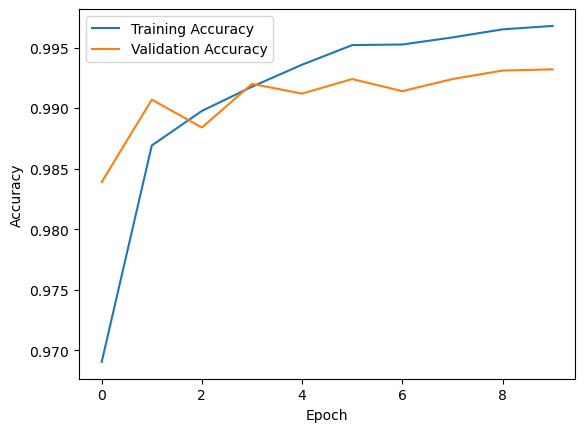

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [19]:
np.random.seed(42)
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000,))
X_test = np.random.rand(200, 20)
y_test = np.random.randint(2, size=(200,))

In [21]:
# Define the model building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(X_train.shape[1],)))
# Tune the number of hidden layers and units
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))
        
        # Add BatchNormalization for each hidden layer
        model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1, activation='sigmoid'))  # Adjust based on your problem (binary or multiclass classification)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',  # Adjust based on your problem
                  metrics=['accuracy'])
    
    return model

In [22]:
# Instantiate the tuner and perform the hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='my_tuner_dir',  # Specify a directory for storing tuner results
    project_name='my_tuner_project'
)

In [23]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [30]:
# Perform the search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [29]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [31]:
# Evaluate the best model
evaluation_results = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {evaluation_results[1]}')

7/7 [==============================] - 1s 5ms/step - loss: 0.6918 - accuracy: 0.5700
Test accuracy: 0.5699999928474426


In [32]:
# Visualize the hyperparameter search results
tuner.results_summary()

Results summary
Results in my_tuner_dir\my_tuner_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 17
units_0: 320
units_1: 320
learning_rate: 0.001
units_2: 192
units_3: 32
units_4: 384
units_5: 448
units_6: 448
units_7: 192
units_8: 160
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 0.5699999928474426

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 416
units_1: 128
learning_rate: 0.001
units_2: 128
units_3: 128
units_4: 224
units_5: 32
units_6: 320
units_7: 96
units_8: 32
Score: 0.550000011920929

Trial 3 summary
Hyperparameters:
num_layers: 19
units_0: 192
units_1: 160
learning_rate: 0.01
units_2: 32
units_3: 192
units_4: 192
units_5: 64
units_6: 128
units_7: 128
units_8: 96
units_9: 448
units_10: 96
units_11: 288
units_12: 320
units_13: 416
units_14: 96
units_15: 320
units_16: 224
units_17: 32
units_18: 32
Score: 0.550000011920929

Trial